# Imports

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
# TODO: seeding

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Conv1D, SeparableConv1D, MaxPooling1D

Using TensorFlow backend.


# Read Data

In [6]:
x_train_df = pd.read_csv('x_train.csv', index_col=0)
x_test_df = pd.read_csv('x_test.csv', index_col=0)
y_train_series = pd.read_csv('y_train.csv', index_col=0, header=None)
y_test_series = pd.read_csv('y_test.csv', index_col=0, header=None)

# Just grab the values for training.
x_train = x_train_df.values
x_test = x_test_df.values
y_train = y_train_series.values
y_test = y_test_series.values
print('Data loaded.')

Data loaded.


# Create and Train Simple ANN

In [7]:
# This is just a silly simple ANN. Neurons per layer were selected with barely
# any thought (except that people tend to use numbers which are powers of 2).
ann = Sequential()
ann.add(Dense(x_train.shape[1], input_dim=x_train.shape[1], activation='relu'))
ann.add(Dense(256, activation='relu'))
ann.add(Dropout(0.25))
ann.add(Dense(128, activation='relu'))
ann.add(Dropout(0.25))
ann.add(Dense(64, activation='relu'))
ann.add(Dropout(0.25))
ann.add(Dense(1))

# TODO: Optimizer? Not getting good results with adadelta or adam.
ann.compile(loss='mean_squared_error', optimizer='adadelta', metrics=['mse'])

ann.summary()

# Create early stopping callback.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Perform the fit. We'll shuffle the data after each epoch, and withhold 
# 20% of the data for validation.
ann.fit(x_train, y_train, epochs=100, shuffle=True,
        validation_split=0.2, callbacks=[early_stop])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_7 (Dense)              (None, 256)               4864      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
__________

# Predict

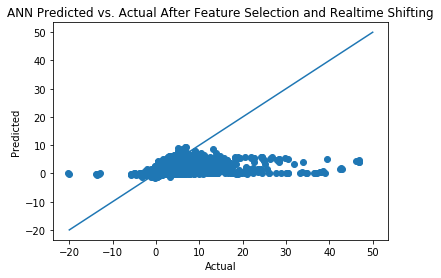

In [9]:
y_pred = ann.predict(x_test)

plt.scatter(y_test, y_pred)
# If our predictions were perfect, they'd fall exactly on this line.
plt.plot([-20, 50], [-20,50])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('ANN Predicted vs. Actual After Feature Selection and Realtime Shifting')
plt.show()